In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Explore dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


<ipython-input-11-d7852bf1e474>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


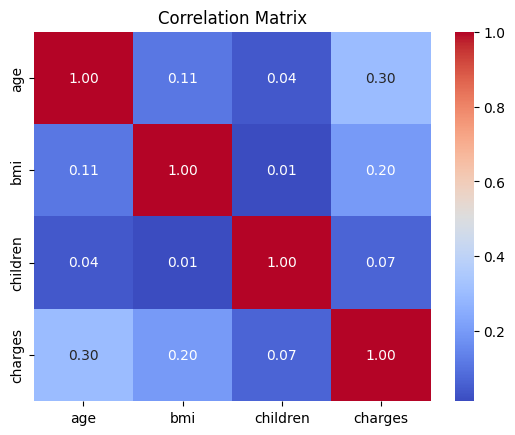

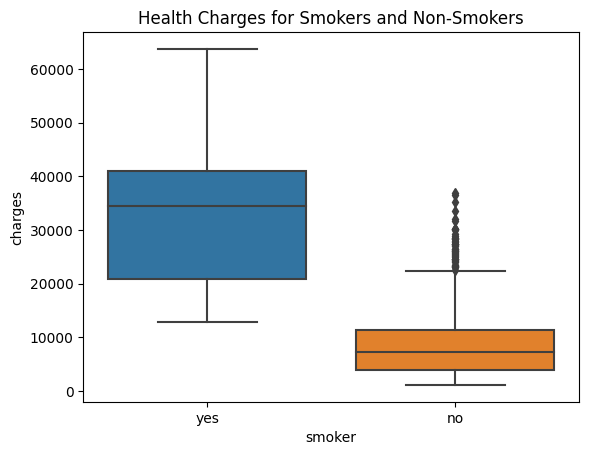

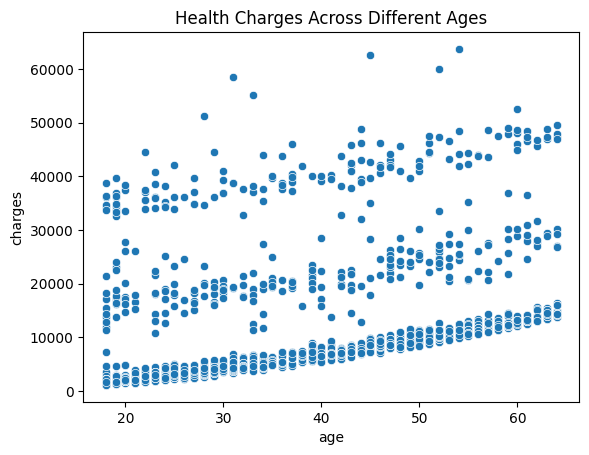

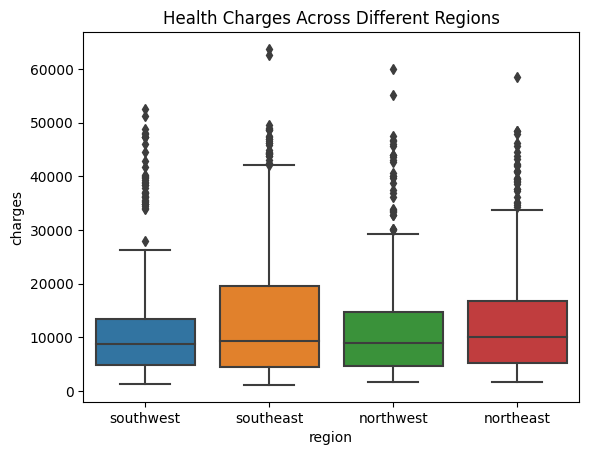

In [11]:
# Descriptive Analysis
print(df.describe())

# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Smoker Analysis
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Health Charges for Smokers and Non-Smokers")
plt.show()

# Age Analysis
sns.scatterplot(x='age', y='charges', data=df)
plt.title("Health Charges Across Different Ages")
plt.show()

# Region Analysis
sns.boxplot(x='region', y='charges', data=df)
plt.title("Health Charges Across Different Regions")
plt.show()

In [12]:
# Feature Engineering
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])

# Regression Analysis
X = pd.get_dummies(df[['age', 'bmi', 'children', 'smoker', 'region', 'bmi_category', 'age_group']], drop_first=True)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

# Cost-Benefit Analysis (Hypothetical)
customer_acquisition_cost = 5000  # hypothetical cost to acquire a customer
customer_retention_cost = 1000     # hypothetical cost to retain a customer

# Calculate total revenue and total cost
total_revenue = df['charges'].sum()
total_cost = customer_acquisition_cost * len(df) + customer_retention_cost * len(df)

# Calculate profit
profit = total_revenue - total_cost

print(f'Total Revenue: ${total_revenue:.2f}')
print(f'Total Cost: ${total_cost:.2f}')
print(f'Profit: ${profit:.2f}')

Mean Squared Error: 33850355.66073092
Total Revenue: $17755824.99
Total Cost: $8028000.00
Profit: $9727824.99


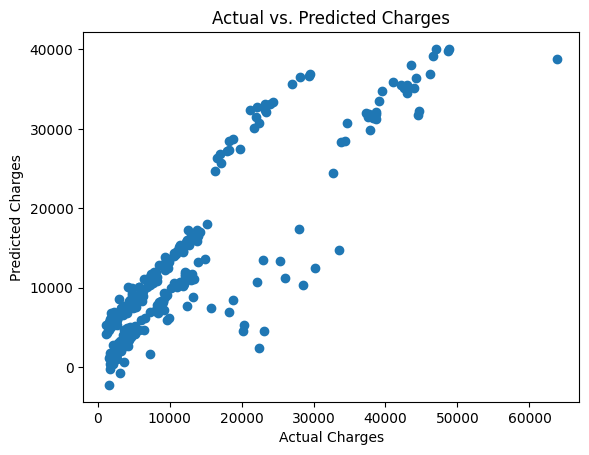

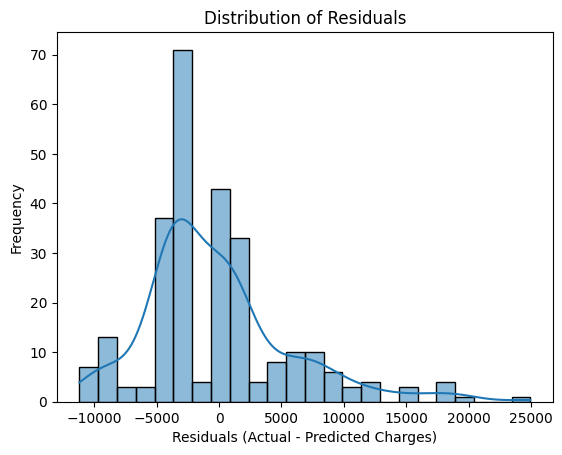

In [13]:
# Visualize Regression Results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

# Visualize Residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted Charges)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()